# Pymaceuticals Inc.
---

### Analysis

- Results and conclusions as per requested.

 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as numpy
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
st_data2 = pd.merge(study_results, mouse_metadata , on="Mouse ID" )

# Display the data table for preview
st_data2.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
unique_mice = st_data2["Mouse ID"].unique()
unique_mice_count = st_data2["Mouse ID"].value_counts()

unique_time = st_data2["Timepoint"].unique()
unique_time_count = st_data2["Timepoint"].value_counts()



print ("Unique mice ID are below:\n")

print (unique_mice)

print (unique_time)
num_mice = len(st_data2["Mouse ID"].unique())
print(f"\n{num_mice} is the total number of mice")


Unique mice ID are below:

['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' 'a818' 'y601' 't724' 'k382' 'w422' 'c326'
 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581' 'a251' 'i386'
 'c580' 'q132' 'u327' 'v603' 'f278' 'g497' 'd474' 'o973' 'c832' 'o331'
 'm650' 'v289' 'm550' 'h428' 'r701' 'v199' 'x264' 'f234' 'c458' 'q610'
 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758' 'x402' 'r811'
 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508' 'e662'
 'z578' 'r921' 'a492' 'w540' 'v764' 'z795' 'e291' 'e584' 'e213' 'j755'
 's565' 'a366' 'p387' 'b879' 'i901' 'k862' 'g867' 's619' 'w697' 'j984'
 'c402' 'h333' 'k510' 'p981' 't451' 'a963' 'm269' 'g989' 'z314' 'o848'
 'v719' 'q597' 'c895' 'a203' 'f394' 'c264' 'n967' 'f545' 'k894' 'k754'
 'g296' 'd164' 'w575' 'x613' 'q633' 'b313' 'f129' 'j365' 'p136' 'c559'
 'a788' 's337' 'q511' 'm331' 'o926' 'd133' 'n630' 

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data_points = st_data2.loc[st_data2.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data_points


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = st_data2.copy()

#Copying the database prior to removing duplicates
data = data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(data["Mouse ID"].unique())
print(f"\n{num_mice} is the total number of mice\n")


unique_mice = data["Mouse ID"].unique()
print ("Unique mice ID are below:\n")
print (unique_mice)


249 is the total number of mice

Unique mice ID are below:

['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' 'a818' 'y601' 't724' 'k382' 'w422' 'c326'
 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581' 'a251' 'i386'
 'c580' 'q132' 'u327' 'v603' 'f278' 'g497' 'd474' 'o973' 'c832' 'o331'
 'm650' 'v289' 'm550' 'h428' 'r701' 'v199' 'x264' 'f234' 'c458' 'q610'
 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758' 'x402' 'r811'
 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508' 'e662'
 'z578' 'r921' 'a492' 'w540' 'v764' 'z795' 'e291' 'e584' 'e213' 'j755'
 's565' 'a366' 'p387' 'b879' 'i901' 'k862' 'g867' 's619' 'w697' 'j984'
 'c402' 'h333' 'k510' 'p981' 't451' 'a963' 'm269' 'g989' 'z314' 'o848'
 'v719' 'q597' 'c895' 'a203' 'f394' 'c264' 'n967' 'f545' 'k894' 'k754'
 'g296' 'd164' 'w575' 'x613' 'q633' 'b313' 'f129' 'j365' 'p136' 'c559'
 'a788' 's337' '

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_data = data[["Drug Regimen","Tumor Volume (mm3)"]]
sum_data = sum_data.groupby("Drug Regimen")

Mean_TVolume = sum_data.mean()
Median_TVolume = sum_data.median()
Variance_TVolume = sum_data.var()
St_Dev_TVolume = sum_data.std()
St_err_TVolume = sum_data.sem()


sum_df = pd.concat([Mean_TVolume, Median_TVolume, Variance_TVolume, St_Dev_TVolume, St_err_TVolume ], axis = 1)

sum_df.columns.array[0] = "Mean Tumor Volume"
sum_df.columns.array[1] = "Median Tumor Volume"
sum_df.columns.array[2] = "Tumor Volume Variance"
sum_df.columns.array[3] = "Tumor Volume Std. Dev."
sum_df.columns.array[4] = "Tumor Volume Std. Err."
sum_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sum_data.agg(["mean","median","var","std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

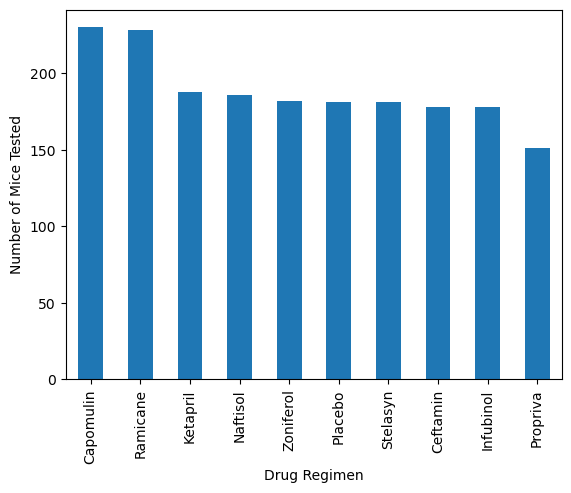

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

x =sum_data.size()

figure1 = x.sort_values(ascending=False).plot(kind="bar")

figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("Number of Mice Tested")
# Show plot
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

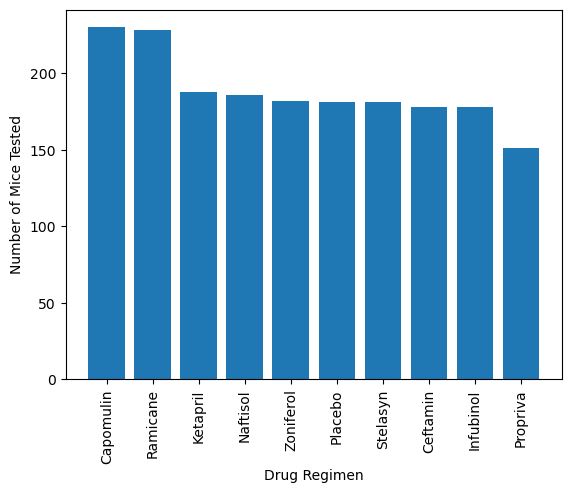

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
vec = x.sort_values(ascending=False)

x_axis = vec.index.tolist()

y_axis = vec.tolist()

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, align="center")

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


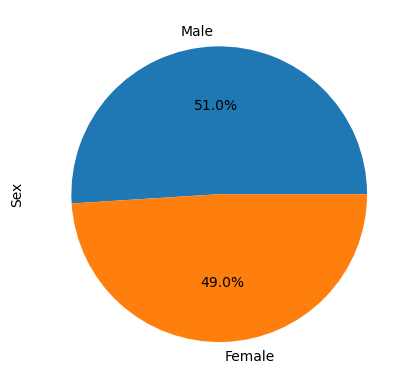

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#numbers adjusted to fit the presentation requirements
ppdata = data["Sex"].value_counts()

ppdata = round (ppdata/ppdata.sum(),2)

ppdata.plot(kind='pie',autopct='%1.1f%%');


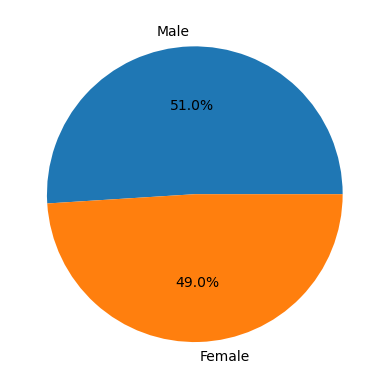

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

vec = ppdata

x_axis = vec.index.tolist()

y_axis = vec.tolist()

# Create a bar chart based upon the above data

plt.pie(y_axis, labels=x_axis, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Data grouped by Mouse ID

test = data.groupby("Mouse ID")

# Max Timeframe per Mouse ID
max_ts = test["Timepoint"].max()

num = len(max_ts)

max_time_df= data.head(0)

#Cycle to find record with Max "Timepoint" per "Mouse ID"

for number in range(num):
    first = data.loc[data['Mouse ID'] == max_ts.index[number], : ]
    res = first.loc[first["Timepoint"] == max_ts.iloc[number], :]
    max_time_df=max_time_df.append(res)


In [17]:
#Dataframe with Tumor Volume in the last Timepoint (And Index Reset)

max_time_df.reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,907,a203,45,67.973419,2,Infubinol,Female,20,23
1,289,a251,45,65.525743,1,Infubinol,Female,21,25
2,1134,a262,45,70.717621,4,Placebo,Female,17,29
3,1487,a275,45,62.999356,3,Ceftamin,Female,20,28
4,736,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
244,1566,z435,10,48.710661,0,Propriva,Female,12,26
245,646,z578,45,30.638696,0,Ramicane,Male,11,16
246,279,z581,45,62.754451,3,Infubinol,Female,24,25
247,683,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to remove index in tumor vol data (for plotting)
blankIndex  = ['']*len(max_time_df)
max_time_df.index = blankIndex

treatments = max_time_df["Drug Regimen"].value_counts()

tot_treaments = len(treatments)

tumor_data=[]
treatment_label=[]

treatment_list = ['Capomulin', 'Ramicane' , 'Infubinol' , 'Ceftamin' ]

#Cycle to find information on each of the treatements
for treatment in treatment_list:

    #Dataframe with treatment information

    treatment_df = max_time_df.loc[max_time_df["Drug Regimen"] == treatment,: ]

    # Calculating statistcal information with treatment information
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mean_treatment = treatment_df["Tumor Volume (mm3)"].mean()
    median_treatment = treatment_df["Tumor Volume (mm3)"].median()

    print(f" ####### Information for {treatment} treatment #######\n")    
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"Interquartile range: {iqr}")
    # print(f"Mean tumor volume: {mean_treatment}")
    # print(f"Media tumor volume: {median_treatment}")
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers for {treatment}")

    #Finding outliers per treatment

    outlier_df = treatment_df.loc[(treatment_df["Tumor Volume (mm3)"]> upper_bound) | (treatment_df["Tumor Volume (mm3)"] < lower_bound), : ]

    outies = outlier_df["Tumor Volume (mm3)"]

    print (f"{treatment}'s potential outliers: {outies}\n")

    #List with Tumor Volumes per treatment
    vec=[]
    vec = [value for value in treatment_df["Tumor Volume (mm3)"]]
    tumor_data.append(vec)
    #Name of the treatment in the loop
    treatment_label.append(treatment)

 ####### Information for Capomulin treatment #######

Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be outliers for Capomulin
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

 ####### Information for Ramicane treatment #######

Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be outliers for Ramicane
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

 ####### Information for Infubinol treatment #######

Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range: 11.477135160000003
Values below 36.83290494999999 and above 82.74144559000001 could be outliers for Infubinol
Infubinol's potential outliers:     36.321346
Name: Tumor Volume (mm3), dtype: float64

 ####### Information for Ceftamin 

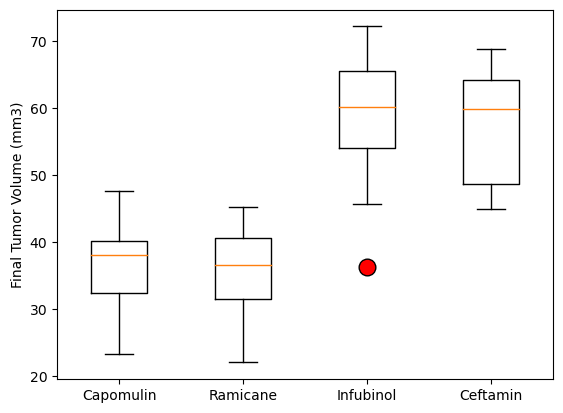

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none')

fig1, ax1 = plt.subplots(squeeze=True)

ax1.set(ylabel='Final Tumor Volume (mm3)')

ax1.boxplot(tumor_data, flierprops=flierprops, labels =treatment_label);



## Line and Scatter Plots

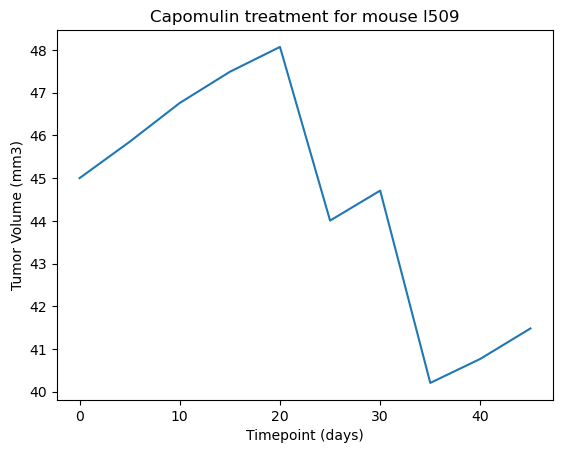

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# To match the reference mouse l509 under the Capomulin treatment was selected 

Capomulin_Mouse_l509_info = data.loc[(data["Mouse ID"]=="l509") & (data["Drug Regimen"]=="Capomulin"), : ]

Capomulin_Mouse_l509_info.head(10)

tumor_vol = Capomulin_Mouse_l509_info["Tumor Volume (mm3)"]
timepoint = Capomulin_Mouse_l509_info["Timepoint"]


fig2, ax2 = plt.subplots(squeeze=True)

ax2.set(ylabel='Tumor Volume (mm3)')
ax2.set_xlabel("Timepoint (days)")
ax2.set_title ("Capomulin treatment for mouse l509")

ax2.plot(timepoint,tumor_vol);

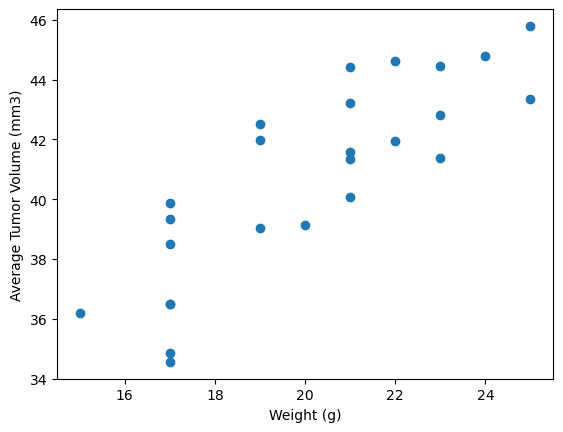

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Locating Mice under Capomulin 
analysis_data_Capomulin = data.loc[(data['Drug Regimen'] == "Capomulin"),:]

#Grouping by average per Mouse
analysis_data_t = analysis_data_Capomulin.groupby("Mouse ID").mean()

#list with average Tumor Volume
avg_vol = [volume for volume in analysis_data_t["Tumor Volume (mm3)"] ]
#List with weights
weight_list = [weight for weight in analysis_data_t["Weight (g)"] ]

#Scatter Plotting the 2 lists
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(weight_list, avg_vol, marker="o");


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


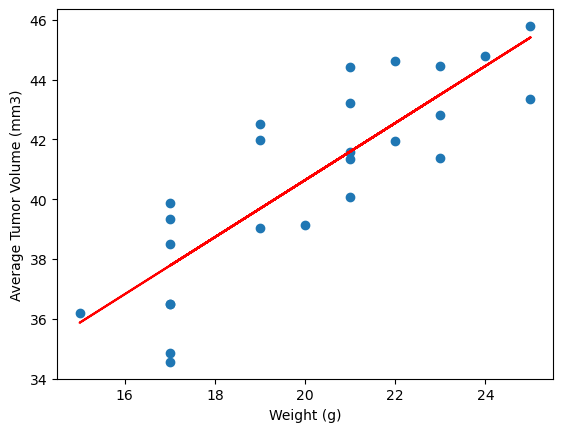

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coeficient Calculation with average tumor voulme and weight
correlation = st.pearsonr(avg_vol,weight_list)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# X and Y values for regression (Pandas Data Frame type)
x_values = analysis_data_t["Weight (g)"]
y_values = analysis_data_t["Tumor Volume (mm3)"]

#Linear regression and plotting
#  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_values,y_values);
plt.plot(x_values,regress_values,"r-");